In [27]:
# Autoreload extension for Jupyter notebooks
%load_ext autoreload
%autoreload 2

# Manual reload
from importlib import reload

# Magic commands for inline plotting and high-res figures
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# Standard library imports
import os
import sys
import pickle

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
from tqdm import tqdm

# Add the parent directory to sys.path (if needed)
# from pathlib import Path
# sys.path.append(str(Path(os.getcwd()).parent))

# Pandas and plotting configurations
pd.set_option('display.max_rows', 1000)
idx = pd.IndexSlice

# Figure formatting
import rsmf.abstract_formatter
FIG_FORMATTER: rsmf.abstract_formatter.AbstractFormatter = rsmf.setup(
    r"\documentclass[a4paper,onecolumn,10pt,unpublished]{quantumarticle}"
)
COLORS = plt.get_cmap('tab10')
plt.rcParams.update({
    "axes.prop_cycle": plt.cycler("color", plt.cm.tab10.colors),
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "figure.constrained_layout.use": True,
    "figure.constrained_layout.h_pad": 0.02,
    "figure.constrained_layout.w_pad": 0.02,
    "figure.constrained_layout.hspace": 0.01,
    "figure.constrained_layout.wspace": 0.01,
    "legend.framealpha": 0.5,
})

# For in-line display of rsmf figures
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.use('module://matplotlib_inline.backend_inline')

# Utility functions
def write_pickle(path, obj):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)

def read_pickle(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

from simulations.analysis.plotting_helpers import (
    error_band_plot, load_data
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## BB code

In [25]:
df_ps_dict = load_data("bb_sliding_window")

In [28]:
list(df_ps_dict.keys())

['max_window_cluster_size_norm_frac_2',
 'committed_cluster_llr_norm_frac_2',
 'avg_window_cluster_size_norm_frac_2',
 'avg_window_cluster_llr_norm_frac_2',
 'max_window_cluster_llr_norm_frac_2']

In [32]:
df_ps = df_ps_dict["committed_cluster_llr_norm_frac_2"]
df_ps.loc[(144, 12, 3e-3, 3, 1)]

KeyError: (144, 12, 0.003, 3, 1)

In [30]:
df_ps_ordinary = load_data("bb_old")["cluster_llr_norm_frac_2"]

df_ps_ordinary.head()

p_fail  delta_p_fail   p_abort  \
n  T p     cluster_llr_norm_frac                                         
72 6 0.001 0.0000                 2.930787e-08  2.930787e-08  0.934464   
           0.0004                 9.663292e-09  9.663292e-09  0.801234   
           0.0005                 3.375110e-08  1.837155e-08  0.646805   
           0.0006                 7.707345e-08  2.306248e-08  0.456094   
           0.0007                 1.852848e-07  3.174223e-08  0.298805   

                                  delta_p_abort      count  num_fails  \
n  T p     cluster_llr_norm_frac                                        
72 6 0.001 0.0000                      0.000015   65536304          0   
           0.0004                      0.000025  198765539          0   
           0.0005                      0.000030  353195237         10   
           0.0006                      0.000031  543906200         40   
           0.0007                      0.000028  701194932        128   

                                  p_fail_conv  delta_p_fail_conv  \
n  T p     cluster_llr_norm_frac                                   
72 6 0.001 0.0000                    0.000027       3.499930e-07   
           0.0004                    0.000027       3.499930e-07   
           0.0005                    0.000027       3.481023e-07   
           0.0006                    0.000026       3.432369e-07   
           0.0007                    0.000026       3.348863e-07   

                                  p_abort_conv  delta_p_abort_conv  \
n  T p     cluster_llr_norm_frac                                     
72 6 0.001 0.0000                     0.158519            0.000023   
           0.0004                     0.158519            0.000023   
           0.0005                     0.153948            0.000022   
           0.0006                     0.142164            0.000022   
           0.0007                     0.120481            0.000020   

                                   count_conv  num_fails_conv  
n  T p     cluster_llr_norm_frac                               
72 6 0.001 0.0000                 841481381.0           22579  
           0.0004                 841481381.0           22579  
           0.0005                 846051969.0           22579  
           0.0006                 857835805.0           22568  
           0.0007                 879518981.0           22583

KeyError: (144, 12, 0.003, 3, 1)

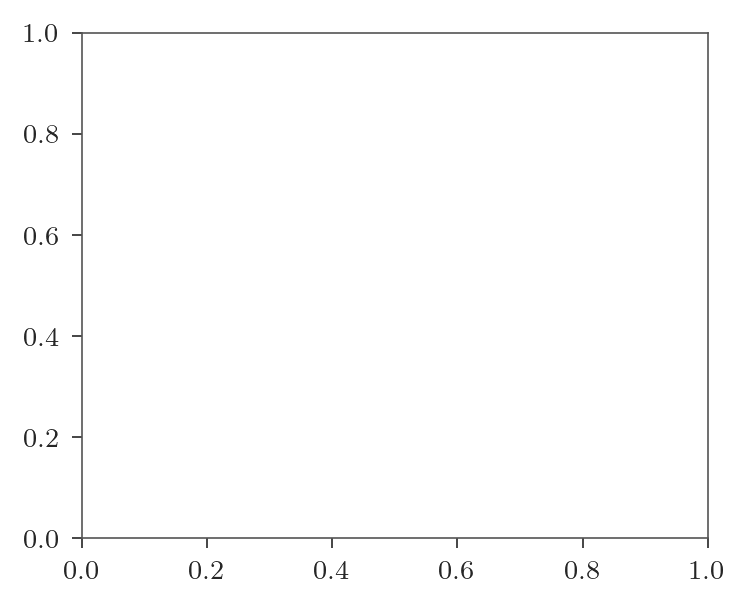

In [31]:
fig = FIG_FORMATTER.figure(aspect_ratio=0.8, width_ratio=0.5)
ax = fig.add_subplot()
n, T, p, W, F = prms = (144, 12, 3e-3, 3, 1)
labels = {
    # "mean_cluster_llr_norm_frac_2": r"Mean cluster LLR 2-norm frac",
    # "max_cluster_llr_norm_frac_2": r"Max cluster LLR 2-norm frac",
    "committed_cluster_llr_norm_frac_2": r"Committed cluster LLR 2-norm frac",
}
for by in df_ps_dict.keys():
    if by not in labels:
        continue
    df_ps = df_ps_dict[by].loc[prms]
    error_band_plot(
        df_ps["p_abort"],
        df_ps["p_fail"] / T,
        df_ps["delta_p_fail"] / T,
        ax=ax,
        label=labels[by],
    )

df_ps_ordinary_sng = df_ps_ordinary.loc[(n, T, p)]
error_band_plot(
    df_ps_ordinary_sng["p_abort"],
    df_ps_ordinary_sng["p_fail"] / T,
    df_ps_ordinary_sng["delta_p_fail"] / T,
    ax=ax,
    linestyle="--",
    label=r"Single shot ($Q_\mathrm{LLR}^{(2)}$)",
)

ax.set_yscale("log")
ax.set_xlim(0, 1)
ax.set_ylim(1e-10, 1)

ax.set_xlabel("Abort rate, $p_\mathrm{abort}$")
ax.set_ylabel("LER per round, $p_\mathrm{log}/T$")
ax.set_title(rf"$[[144, 12, 12]]$ BB code, $(3,1)$-SW, $p={p:.3f}$", fontsize=9)

ax.legend(fontsize=8)

# fig.savefig("overleaf_figs/sliding_window_bb_code_ler_vs_abort_rate.pdf")

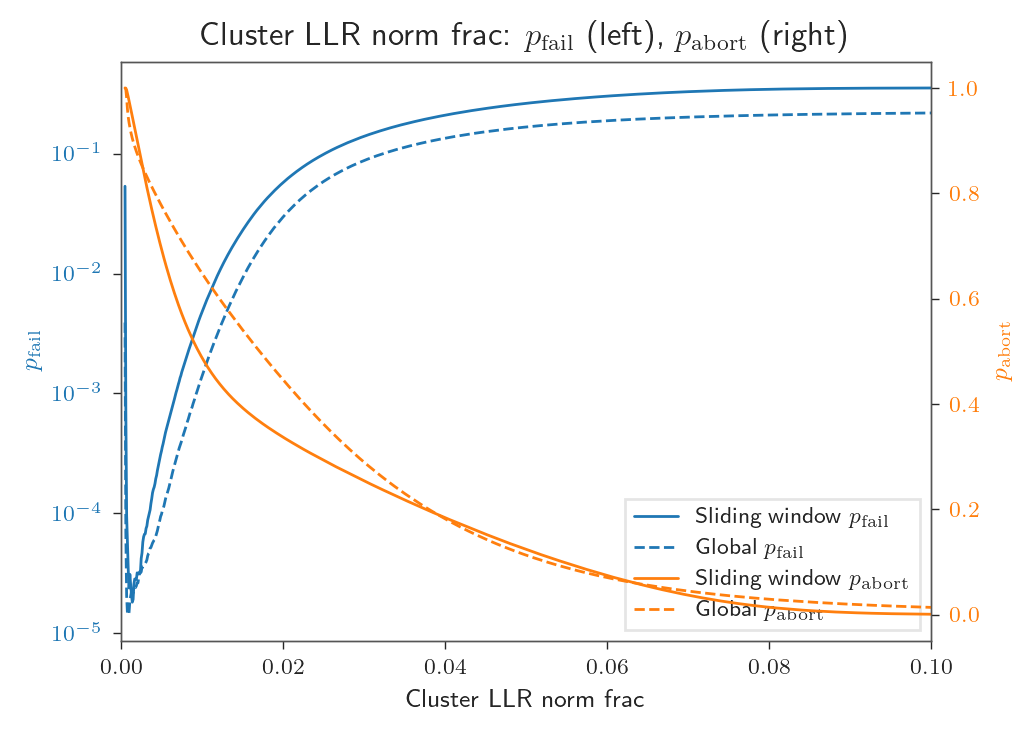

In [22]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_cluster_llr_norm_frac_dual_axis(
    df_ps: pd.DataFrame,
    df_ps_ordinary: pd.DataFrame,
    prms: tuple,
    label_main: str = r"Sliding window",
    label_ordinary: str = r"Single shot",
    color_pfail: str = "tab:blue",
    color_pabort: str = "tab:orange",
) -> None:
    """
    Plot p_fail and p_abort for cluster_llr_norm_frac using dual y-axes.

    This function plots the logical error rate (p_fail) and abort rate (p_abort) for the
    cluster_llr_norm_frac metric, comparing sliding window and single shot (ordinary) results.
    The sliding window data is selected using a 5-tuple (n, T, p, W, F), while the ordinary
    data is selected using a 3-tuple (n, T, p).

    Parameters
    ----------
    df_ps : pandas DataFrame
        DataFrame for sliding window results, indexed by (n, T, p, W, F).
    df_ps_ordinary : pandas DataFrame
        DataFrame for ordinary (single shot) results, indexed by (n, T, p).
    prms : tuple
        Parameter tuple (n, T, p, W, F) for selecting the sliding window data.
    by : str
        Metric key for cluster_llr_norm_frac.
    label_main : str
        Label for the sliding window curve.
    label_ordinary : str
        Label for the single shot curve.
    color_pfail : str
        Color for the p_fail curve.
    color_pabort : str
        Color for the p_abort curve.

    Returns
    -------
    None
        The function creates and displays a matplotlib plot.
    """
    # Prepare data for sliding window (5-tuple index)
    df_ps_sel = df_ps.loc[prms].reset_index()
    x_sw = df_ps_sel["committed_cluster_llr_norm_frac"]
    y_pfail_sw = df_ps_sel["p_fail"]
    y_pabort_sw = df_ps_sel["p_abort"]

    # Prepare data for ordinary (single shot) (3-tuple index)
    n, T, p, _, _ = prms
    df_ps_ordinary_sng = df_ps_ordinary.loc[(n, T, p)].reset_index()
    x_ord = df_ps_ordinary_sng["cluster_llr_norm_frac"]
    y_pfail_ord = df_ps_ordinary_sng["p_fail"]
    y_pabort_ord = df_ps_ordinary_sng["p_abort"]

    fig, ax1 = plt.subplots(figsize=(5, 3.5))

    # Left y-axis: p_fail
    l1 = ax1.plot(
        x_sw,
        y_pfail_sw,
        label=f"{label_main} $p_{{\\mathrm{{fail}}}}$",
        color=color_pfail,
    )
    l2 = ax1.plot(
        x_ord,
        y_pfail_ord,
        "--",
        label=f"{label_ordinary} $p_{{\\mathrm{{fail}}}}$",
        color=color_pfail,
    )
    ax1.set_ylabel(r"$p_\mathrm{fail}$", color=color_pfail)
    ax1.set_xlabel(r"Cluster LLR norm frac")
    ax1.set_yscale("log")
    ax1.tick_params(axis="y", labelcolor=color_pfail)

    # Right y-axis: p_abort
    ax2 = ax1.twinx()
    l3 = ax2.plot(
        x_sw,
        y_pabort_sw,
        label=f"{label_main} $p_{{\\mathrm{{abort}}}}$",
        color=color_pabort,
        linestyle="-",
    )
    l4 = ax2.plot(
        x_ord,
        y_pabort_ord,
        "--",
        label=f"{label_ordinary} $p_{{\\mathrm{{abort}}}}$",
        color=color_pabort,
    )
    ax2.set_ylabel(r"$p_\mathrm{abort}$", color=color_pabort)
    ax2.tick_params(axis="y", labelcolor=color_pabort)

    # Legend
    lines = l1 + l2 + l3 + l4
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc="best", fontsize=8)

    ax1.set_title(
        "Cluster LLR norm frac: $p_\\mathrm{fail}$ (left), $p_\\mathrm{abort}$ (right)"
    )

    ax1.set_xlim(0, 0.1)

    plt.show()


plot_cluster_llr_norm_frac_dual_axis(
    df_ps=df_ps,
    df_ps_ordinary=df_ps_ordinary,
    prms=(144, 12, 5e-3, 3, 1),
    label_main="Sliding window",
    label_ordinary="Global",
)